In [1]:
import pandas as pd
df = pd.read_csv('data/processed.csv')

In [2]:
num_buckets = 10
df['imbalance_bucket'] = pd.qcut(df['imbalance'], num_buckets, labels=False)

In [3]:
# calculating the conditional probability for each bucket
bucket_probability = df.groupby('imbalance_bucket')['up'].mean()

# adding counts to understand probability properly
counts = df.groupby('imbalance_bucket')['up'].count()

In [4]:
analysis = pd.DataFrame({
    "prob_up": bucket_probability,
    "count": counts
})

In [5]:
analysis

,prob_up,count
imbalance_bucket,,
0,0.005286,4522359
1,0.005126,4522361
2,0.004574,4522355
3,0.005655,4522358
4,0.008035,4522365
5,0.012098,4522352
6,0.019083,4522362
7,0.035575,4522354
8,0.089350,4522362


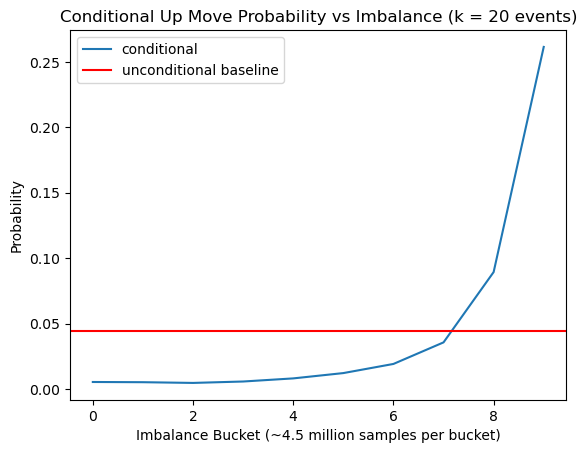

In [6]:
import matplotlib.pyplot as plt
plt.plot(analysis['prob_up'])
plt.axhline(df['up'].mean(), color='red')
plt.xlabel('Imbalance Bucket (~4.5 million samples per bucket)')
plt.ylabel('Probability')
plt.title('Conditional Up Move Probability vs Imbalance (k = 20 events)')
plt.legend({'conditional', 'unconditional baseline'})

So far, the probability calculated is the conditional probability that the mid price will go strictly up given the imbalance. But, in reality, even the price staying the same can also be profitable. ALthough this relies on queue dynamics, it might be worth calculating the conditional probability that the mid price does not go down given the imbalance. This is expected to be much larger than the above calculated probabilities.

In [7]:
df['not_down'] = (df['future_mid'] >= df['mid']).astype(int)

In [8]:
not_down_probabilities = df.groupby('imbalance_bucket')['not_down'].mean()

In [9]:
not_down_probabilities.describe()

count    10.000000
mean      0.957677
std       0.078100
min       0.745549
25%       0.971972
50%       0.990228
75%       0.994802
max       0.995585
Name: not_down, dtype: float64

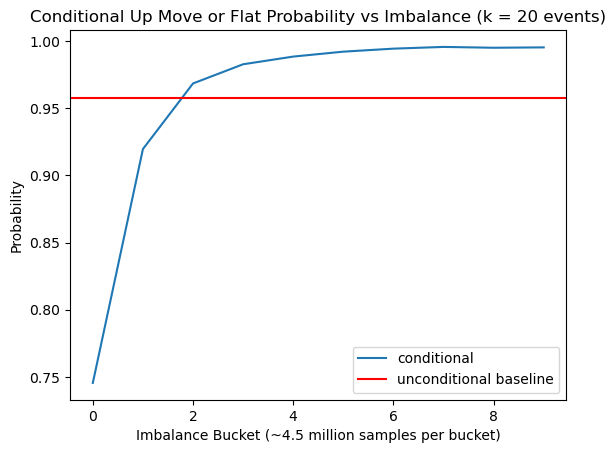

In [10]:
plt.plot(not_down_probabilities)
plt.axhline(df['not_down'].mean(), color='red')
plt.xlabel('Imbalance Bucket (~4.5 million samples per bucket)')
plt.ylabel('Probability')
plt.title('Conditional Up Move or Flat Probability vs Imbalance (k = 20 events)')
plt.legend({'conditional', 'unconditional baseline'})